In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [3]:
titanic=pd.read_csv("Titanic.csv")
titanic

C:\Users\MRUH\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Gender    2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


C:\Users\MRUH\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\MRUH\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<BarContainer object of 4 artists>

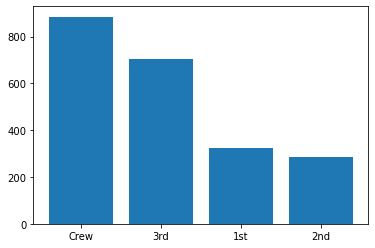

In [5]:
counts=titanic['Class'].value_counts()
plt.bar(counts.index,counts.values)

In [6]:
df=pd.get_dummies(titanic,dtype=int)
df.head()

C:\Users\MRUH\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Class_1st      2201 non-null   int32
 1   Class_2nd      2201 non-null   int32
 2   Class_3rd      2201 non-null   int32
 3   Class_Crew     2201 non-null   int32
 4   Gender_Female  2201 non-null   int32
 5   Gender_Male    2201 non-null   int32
 6   Age_Adult      2201 non-null   int32
 7   Age_Child      2201 non-null   int32
 8   Survived_No    2201 non-null   int32
 9   Survived_Yes   2201 non-null   int32
dtypes: int32(10)
memory usage: 86.1 KB


C:\Users\MRUH\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
frequent_itemsets=apriori(df,min_support=0.05,use_colnames=True,max_len=None)
frequent_itemsets

C:\Users\MRUH\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\MRUH\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
...,...,...
58,0.053612,"(Age_Adult, Gender_Male, Class_1st, Survived_No)"
59,0.069968,"(Age_Adult, Gender_Male, Survived_No, Class_2nd)"
60,0.175829,"(Age_Adult, Class_3rd, Survived_No, Gender_Male)"
61,0.304407,"(Class_Crew, Gender_Male, Age_Adult, Survived_No)"


In [13]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1.0)
rules

C:\Users\MRUH\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Gender_Female),(Class_1st),0.213539,0.147660,0.065879,0.308511,2.089329,1.0,0.034348,1.232615,0.662941,0.223077,0.188716,0.377332
1,(Class_1st),(Gender_Female),0.147660,0.213539,0.065879,0.446154,2.089329,1.0,0.034348,1.419998,0.611701,0.223077,0.295774,0.377332
2,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,1.0,0.004587,1.005694,0.639010,0.152050,0.005661,0.567012
3,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,1.0,0.004587,2.682493,0.037128,0.152050,0.627212,0.567012
4,(Survived_Yes),(Class_1st),0.323035,0.147660,0.092231,0.285513,1.933584,1.0,0.044531,1.192940,0.713221,0.243697,0.161735,0.455064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,"(Age_Adult, Gender_Male)","(Survived_Yes, Class_Crew)",0.757383,0.096320,0.087233,0.115177,1.195776,1.0,0.014282,1.021312,0.674821,0.113811,0.020867,0.510419
160,"(Age_Adult, Class_Crew)","(Survived_Yes, Gender_Male)",0.402090,0.166742,0.087233,0.216949,1.301104,1.0,0.020188,1.064117,0.387051,0.181132,0.060254,0.370055
161,(Gender_Male),"(Survived_Yes, Age_Adult, Class_Crew)",0.786461,0.096320,0.087233,0.110919,1.151565,1.0,0.011481,1.016420,0.616356,0.109652,0.016155,0.508289
162,(Age_Adult),"(Survived_Yes, Gender_Male, Class_Crew)",0.950477,0.087233,0.087233,0.091778,1.052103,1.0,0.004320,1.005004,1.000000,0.091778,0.004980,0.545889


In [14]:
rules.sort_values(by='lift',ascending=False)

C:\Users\MRUH\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
110,"(Survived_Yes, Class_1st)","(Gender_Female, Age_Adult)",0.092231,0.193094,0.063607,0.689655,3.571602,1.0,0.045798,2.600030,0.793168,0.286885,0.615389,0.509533
107,"(Gender_Female, Age_Adult)","(Survived_Yes, Class_1st)",0.193094,0.092231,0.063607,0.329412,3.571602,1.0,0.045798,1.353691,0.892314,0.286885,0.261279,0.509533
112,(Gender_Female),"(Survived_Yes, Age_Adult, Class_1st)",0.213539,0.089505,0.063607,0.297872,3.328005,1.0,0.044495,1.296766,0.889453,0.265655,0.228851,0.504266
105,"(Survived_Yes, Age_Adult, Class_1st)",(Gender_Female),0.089505,0.213539,0.063607,0.710660,3.328005,1.0,0.044495,2.718119,0.768285,0.265655,0.632098,0.504266
35,(Gender_Female),"(Survived_Yes, Class_1st)",0.213539,0.092231,0.064062,0.300000,3.252709,1.0,0.044367,1.296813,0.880609,0.265038,0.228879,0.497291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,1.0,0.009900,1.419023,0.046906,0.670709,0.295290,0.826241
20,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,1.0,0.009870,1.051116,0.263149,0.773191,0.048630,0.879936
21,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,1.0,0.009870,1.339441,0.061028,0.773191,0.253420,0.879936
119,"(Age_Adult, Survived_No)","(Gender_Male, Class_1st)",0.653339,0.081781,0.053612,0.082058,1.003392,1.0,0.000181,1.000302,0.009752,0.078667,0.000302,0.368807


C:\Users\MRUH\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


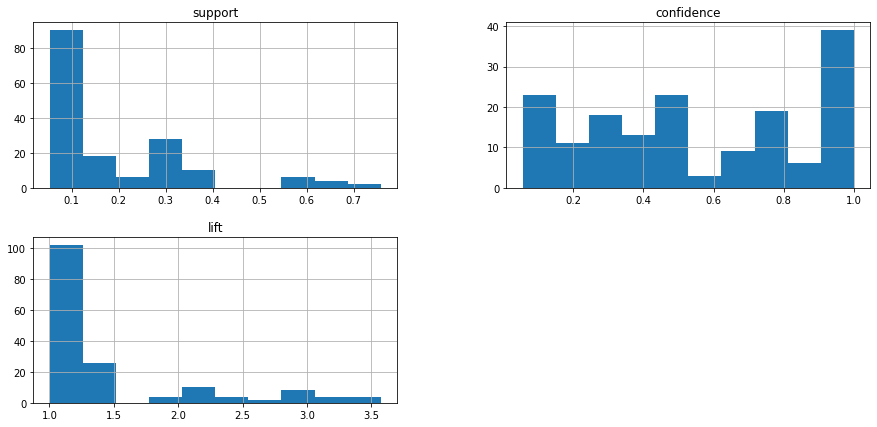

In [24]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

C:\Users\MRUH\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


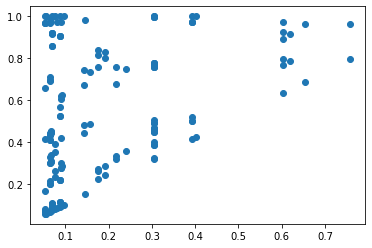

In [25]:
plt.scatter(rules['support'],rules['confidence'])
plt.show()

In [28]:
rules[rules['consequents']==({'Survived_Yes'})]

C:\Users\MRUH\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
5,(Class_1st),(Survived_Yes),0.147660,0.323035,0.092231,0.624615,1.933584,1.0,0.044531,1.803390,0.566471,0.243697,0.445489,0.455064
7,(Class_2nd),(Survived_Yes),0.129487,0.323035,0.053612,0.414035,1.281704,1.0,0.011783,1.155300,0.252481,0.134396,0.134424,0.289999
18,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,1.0,0.087312,2.525187,0.710327,0.410992,0.603990,0.607870
33,"(Gender_Female, Class_1st)",(Survived_Yes),0.065879,0.323035,0.064062,0.972414,3.010243,1.0,0.042781,24.539982,0.714898,0.197203,0.959250,0.585363
46,"(Age_Adult, Class_1st)",(Survived_Yes),0.144934,0.323035,0.089505,0.617555,1.911727,1.0,0.042686,1.770097,0.557750,0.236495,0.435059,0.447315
92,"(Gender_Female, Age_Adult)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,1.0,0.081195,2.639542,0.700873,0.385366,0.621146,0.593987
104,"(Gender_Female, Age_Adult, Class_1st)",(Survived_Yes),0.065425,0.323035,0.063607,0.972222,3.009650,1.0,0.042473,24.370741,0.714480,0.195804,0.958967,0.584564
